# Limpeza do Texto Recuperado
Conserta falhas e erros no reconhecimento dos caracteres. Junta duas sessões que foram separadas em uma única lista

In [93]:
with open("arterias/arterias.txt", "r") as arquivo_veias, open("arterias/arterias.csv", "w") as veia_csv:
    veias = arquivo_veias.read()
    ini = "T3 x terminal auperior da a. carebral módia (2) 8"
    fim = "Table 2: Dados geométricos das artérias do cérebro. (n): número total de ocorrências"
    param_veias = veias.split(ini)[1].split(fim)[0]
    param_veias = param_veias.replace("T","7")
    param_veias = param_veias.replace("-",".")
    param_veias = param_veias.replace(" 0 "," 0.")
    param_veias = param_veias.replace("O","0")
    param_veias = param_veias.replace("..",".")
    param_veias = param_veias.replace(" 10."," 0.")
    param_veias = param_veias.replace(" 09."," 0.")
    param_veias = param_veias.replace(" 86."," 6.")
    param_veias = param_veias.replace(" 0.3765"," 0.2765")
    param_veias = param_veias.replace(" 0.0809"," 0.0309")
    param_veias = param_veias.replace(" 0.07973"," 0.0292")
    param_veias = param_veias.split('\n')
    param_veias = [linha.split() for linha in param_veias if linha]
    veias = veias.replace("(2)"," (2)")
    veias = veias.replace(" àa "," a ")
    veias = veias.replace(" aà. "," a ")
    veias = veias.replace(" aà "," a ")
    veias = veias.replace(" x "," r ")
    veias = veias.replace("9D a","9 a")
    veias = veias.replace(" a "," a. ")
    veias = veias.replace(" r "," r. ")
    veias = veias.replace("680 r. ","60 r. ")
    veias = veias.replace(" à "," a. ")
    veias = veias.replace("37  p","37 a. p")
    veias = veias.replace("38  p","38 a. p")
    veias = veias.replace("39  p","39 a. p")
    veias = veias.split('\n')
    veias = [linha for linha in veias if linha]

    nome_veias = [linha.replace("T", "7") for linha in veias if (" a. " in linha) or( " r. " in linha)]
    nome_v_vet = [vetor.split()[:-2] for vetor in nome_veias]
    nome_veias = [" ".join([l[0]]+ l[2:][-2:]) for l in nome_v_vet]
    #nome_veias = [" ".join([l.split()[0]]+l[:-6].split()[min(len(nome_veias)):]) for l in nome_veias]
    #[print(l) for l in nome_veias]
    # print(len(nome_veias))
    #[print(f"{n} {l}") for n, l in enumerate(param_veias)]

    #print(len(param_veias))
    nome_params = zip(nome_veias, param_veias)
    veias_param = [[nome]+params for nome, params in nome_params]
    head = "Nome do vaso,Cmin(cm),Cmax(cm),R(cm),h(cm)".split(',')
    veias_param = [head]+veias_param
    from csv import writer
    cvs_write = writer(veia_csv)
    def not_number(num):
        try:
            float(num)
            return False
        except ValueError:
            return True
    [cvs_write.writerow(line) for line in veias_param]
    #[print(line) for line in veias_param] # if not_number(line[1])]
    [print(line) for line in veias_param[1:] if float(line[2])>10] # if not_number(line[1])]


['3 carótida Interna', '13.710', '13.710', '0.2765', '0.05477']
['36 vartabral', '21.1390', '21.190', '0.1935', '0.0365']


# Observando Os Dados Das Veias

Importando os dados das veias no dataframe para estudar o perfil.


In [94]:
with open("arterias/arterias.csv", "r") as veia_csv:
    #The easiest way to do this :

    import pandas as pd
    df = pd.read_csv ('arterias/arterias.csv')
df

,Nome do vaso,Cmin(cm),Cmax(cm),R(cm),h(cm)
0,1 basilar,2.27,2.23777,0.17340,0.04360
1,2 calosomarginal,4.78,4.78000,0.06230,0.02080
2,3 carótida Interna,13.71,13.71000,0.27650,0.05477
3,4 central póstaromedial,0.27,0.29000,0.02060,0.00790
4,5 infarior antaerior,3.75,3.75000,0.03660,0.01340
...,...,...,...,...,...
68,69 cerebra! méódia,2.99,3.99000,0.05000,0.01750
69,70 occlpital lateral,2.07,2.07000,0.09375,0.01360
70,71 corebral módia,5.76,5.77600,0.05000,0.01750
71,72 cereabral média,7.21,7.21000,0.08160,0.02690


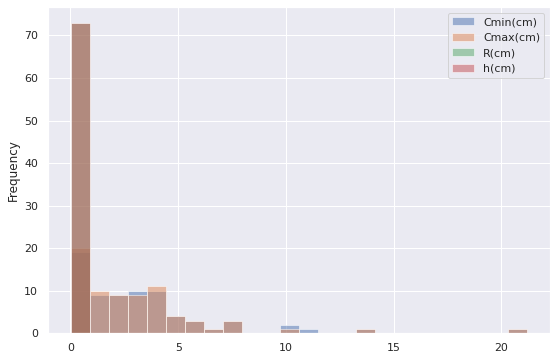

In [96]:
ax = df.plot.hist(bins=24, alpha=0.5)

# Distribuição das Características dos Vasos

Observando as distribuições, temos que será possivel classificar os valores em grupos: alto, médio, baixo.

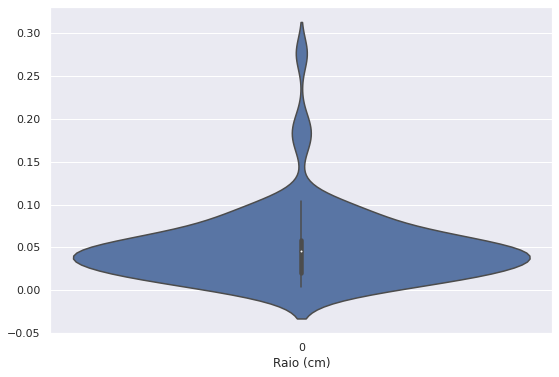

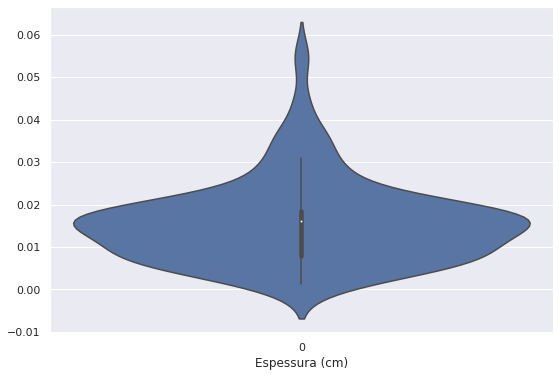

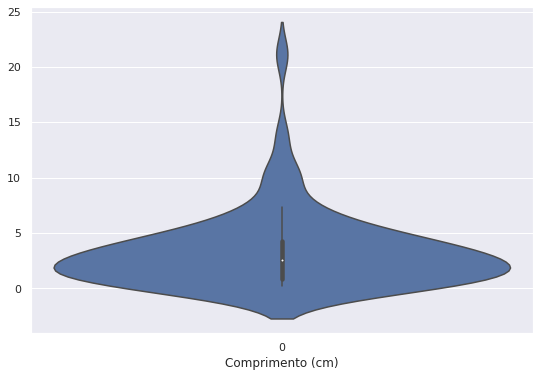

In [97]:
import seaborn as sb
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
dataFrame = pd.read_csv("arterias/arterias.csv")
# sb.violinplot(data=dataFrame)

# plotting violin plot with Weight (kgs)
sb.violinplot(data=dataFrame['R(cm)'])
plt.xlabel("Raio (cm)")
# display
plt.show()
sb.violinplot(data=dataFrame['h(cm)'])
# set label
plt.xlabel("Espessura (cm)")
# display
plt.show()
sb.violinplot(data=dataFrame['Cmin(cm)'])
# set label
plt.xlabel("Comprimento (cm)")
# display
plt.show()

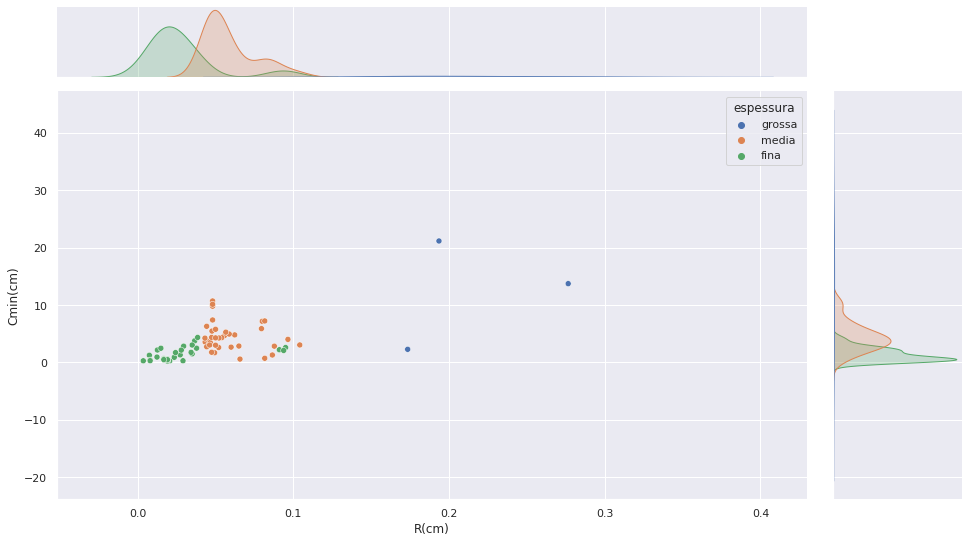

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
df = pd.read_csv("arterias/arterias.csv")
hcm = df['h(cm)']
# df['espessura'] = "alta" if hcm > 0.05 else 'media' if 0.2 < hcm <= 0.05 else 'baixa'
# g, f = 0.025, 0.015
g, f = 0.036, 0.015
df['espessura'] = [
    "grossa" if h > g else 'media' if f < h <= g else 'fina' for h in hcm]
df
#fig, ax = plt.subplots()
# This will change the limits of the x-axis
#ax.set_xlim(0, 1)
sns.jointplot(data=df, x="R(cm)", y="Cmin(cm)", hue="espessura", ax = ax)
plt.gcf().set_size_inches(15, 8)

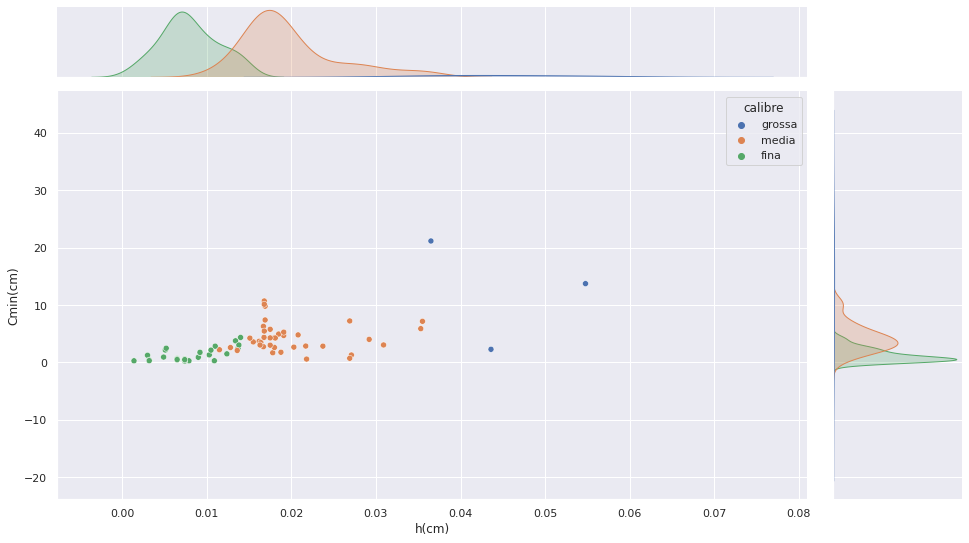

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
df = pd.read_csv("arterias/arterias.csv")
rcm = df['R(cm)']
g, f = 0.15, 0.04
df['calibre'] = [
    "grossa" if h > g else 'media' if f < h <= g else 'fina' for h in rcm]
#    "grossa" if h > 0.02 else 'media' if 0.015 < h <= 0.03 else 'fina' for h in hcm]
df
#fig, ax = plt.subplots()
# This will change the limits of the x-axis
#ax.set_xlim(0, 1)
sns.jointplot(data=df, x="h(cm)", y="Cmin(cm)", hue="calibre", ax = ax)
plt.gcf().set_size_inches(15, 8)